# 1. Initialize the environment

In [1]:
cd ../..

/Users/mf/Developer/magnetisation_reconstruction/2D


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from Magnetisation.Propagator import Propagator
from Magnetisation.Generator import generator_CNN
from Magnetisation.Train import Magnetisation_CNN_training
from Magnetisation.utils import LoadData

import numpy as np
import json
import torch
import matplotlib.pyplot as plt

# 2. Training

## 2.1. Load data

[[ 3.82043162e-06  8.25182426e-06 -5.85974162e-05 ... -1.32886212e-05
   7.85667736e-06  2.52794052e-06]
 [-1.03751539e-05  1.59147630e-05 -2.15386139e-05 ...  3.18917822e-05
  -2.86749062e-05 -1.75434055e-06]
 [-4.86705608e-06  5.96104342e-06  2.45015409e-05 ... -7.80432699e-06
   3.91872698e-05 -1.91418349e-05]
 ...
 [-4.86568276e-05 -3.97203703e-05 -4.86365415e-05 ... -7.41497129e-06
  -4.57882477e-05  1.96429779e-05]
 [-1.56384341e-06  3.99999258e-05  3.01075592e-05 ...  7.03344502e-06
   1.19252599e-05 -2.05620612e-05]
 [ 3.06098671e-05  2.13450159e-05  2.56123705e-05 ... -6.09039805e-06
  -6.35857736e-06 -4.48427387e-05]]
[[ 3.82043162e-06  8.25182426e-06 -5.85974162e-05 ... -1.32886212e-05
   7.85667736e-06  2.52794052e-06]
 [-1.03751539e-05  1.59147630e-05 -2.15386139e-05 ...  3.18917822e-05
  -2.86749062e-05 -1.75434055e-06]
 [-4.86705608e-06  5.96104342e-06  2.45015409e-05 ... -7.80432699e-06
   3.91872698e-05 -1.91418349e-05]
 ...
 [-4.86568276e-05 -3.97203703e-05 -4.8636541

{'PixelSize': 5e-08,
 'ImageShape': [256, 256],
 'NV': {'Height': 5e-08,
  'Theta': 0,
  'FindTheta': False,
  'Phi': 0,
  'FindPhi': False},
 'Magnetisation': {'Phi': [0, 0, 1],
  'FindPhi': False,
  'Theta': [0, 0, 1],
  'FindTheta': False},
 'FFT': {'PaddingFactor': 2,
  'performPadding': False,
  'PaddingMode': 'constant',
  'Extended': False,
  'Extention': 100,
  'Filter': {'useHanning': False,
   'useHighCutoff': False,
   'useLowCutoff': False,
   'LambdaHighCutoff': 1e-07,
   'LambdaLowCutoff': 7e-06}}}

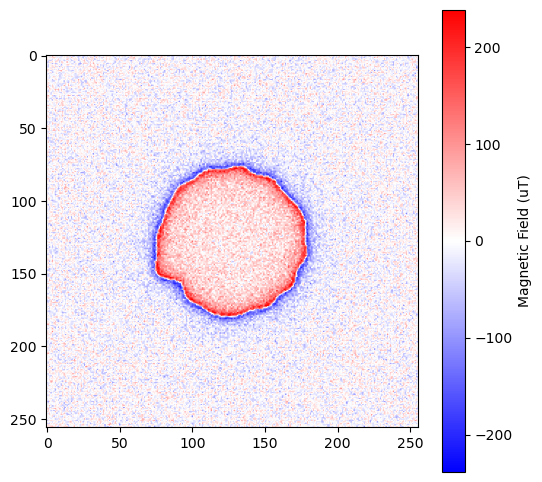

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load training data from simulations
dataPath = '../Database/SimulatedData/Blob_simulation_1'

PROP = LoadData(dataPath, ImageShape = 256, Normalise=True, Display=True)

display(PROP.options)

## 2.2. Initialize net

In [29]:
# Make the neural network
Generator = generator_CNN(Size=1, ImageSize=PROP.options['ImageShape']).to(device)

TypeError: super(type, obj): obj must be an instance or subtype of type

## 2.3. Set parameters for the training: loss function, epoch number

In [7]:
# Set the machine learning paramaters for keyword unpacking
ML_options = dict()
ML_options['mlp']=False
ML_options['LossFunction']='L1'
ML_options['Magnetization']=None
ML_options['IntegerOnly']=False
ML_options['PositiveMagnetisationOnly']=True
ML_options['PrintLossValue']=False
ML_options['Epochs']= 150

# Update some of the options
PROP.options['Magnetisation']['Theta']= 90
PROP.options['Magnetisation']['FindTheta']= False
PROP.options['Magnetisation']['Phi'] = -45
PROP.options['Magnetisation']['FindPhi']= False
display(PROP.options)

{'PixelSize': 4.8e-07,
 'ImageShape': 256,
 'NV': {'Height': 3e-07,
  'Theta': 0,
  'FindTheta': False,
  'Phi': 0,
  'FindPhi': False},
 'Magnetisation': {'Phi': -45,
  'FindPhi': False,
  'Theta': 90,
  'FindTheta': False},
 'FFT': {'PaddingFactor': 2,
  'performPadding': False,
  'PaddingMode': 'constant',
  'Extended': False,
  'Extention': 100,
  'Filter': {'useHanning': False,
   'useHighCutoff': False,
   'useLowCutoff': False,
   'LambdaHighCutoff': 1e-07,
   'LambdaLowCutoff': 7e-06}}}

## 2.4. Train the network

100%|██████████| 150/150 [02:06<00:00,  1.19it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


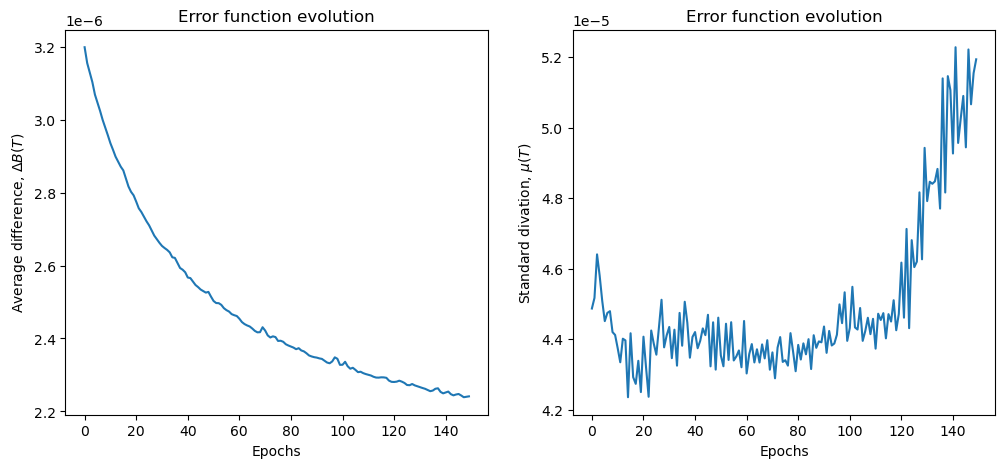

In [9]:
CNN_training = Magnetisation_CNN_training(device, Generator, PROP, ML_options)
bnv_cnn = CNN_training.train_cnn(**ML_options)

/Users/mf/Developer/magnetisation_reconstruction/2D/Magnetisation/Train.py:274: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Original B"] = np.rot90(self.PROP.MagneticFieldExtended[self.PROP.OriginalROI] * unit_conversion_M_to_B, k=1)
/Users/mf/Developer/magnetisation_reconstruction/2D/Magnetisation/Train.py:275: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Reconstructed B"] = np.rot90(ReconstructedBnv[self.PROP.OriginalROI] * unit_conversion_M_to_B , k=1)
/Users/mf/Developer/magnetisation_reconstruction/2D/Magnetisati

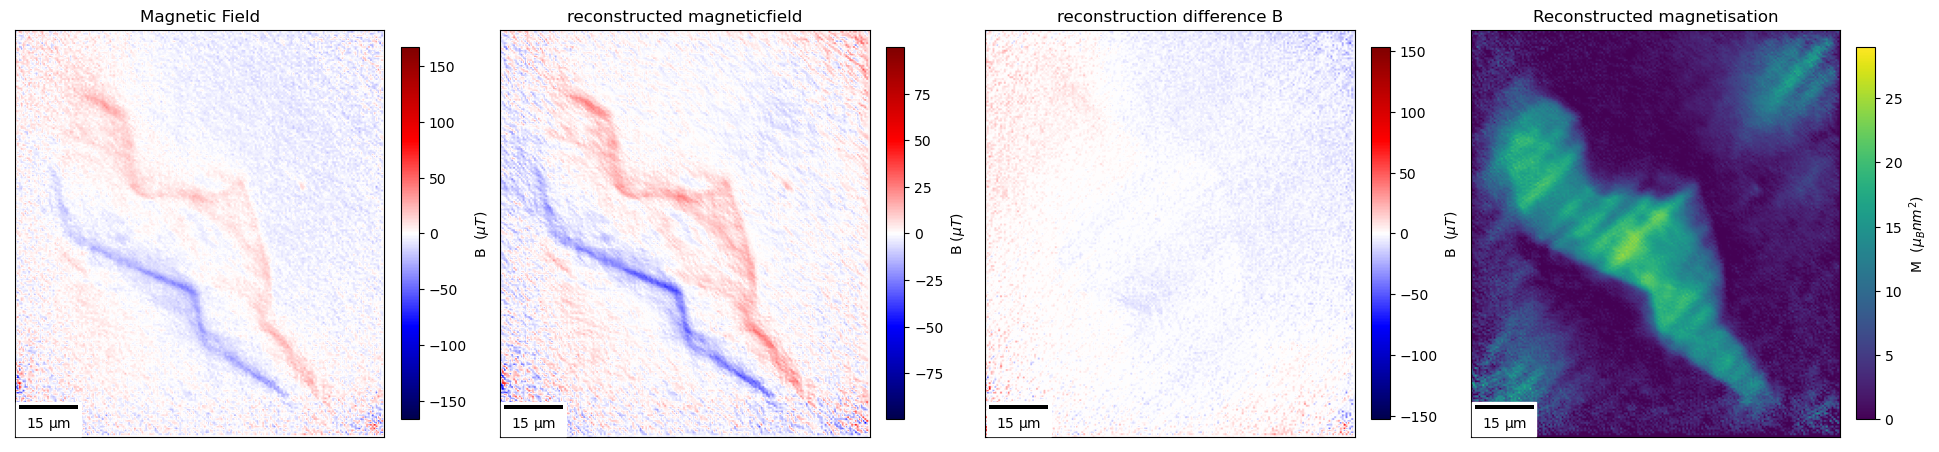

In [10]:
# Get the results and plot (new Generator with updated BatchNorm layers)
Results = CNN_training.extract_results(plotResults = True)

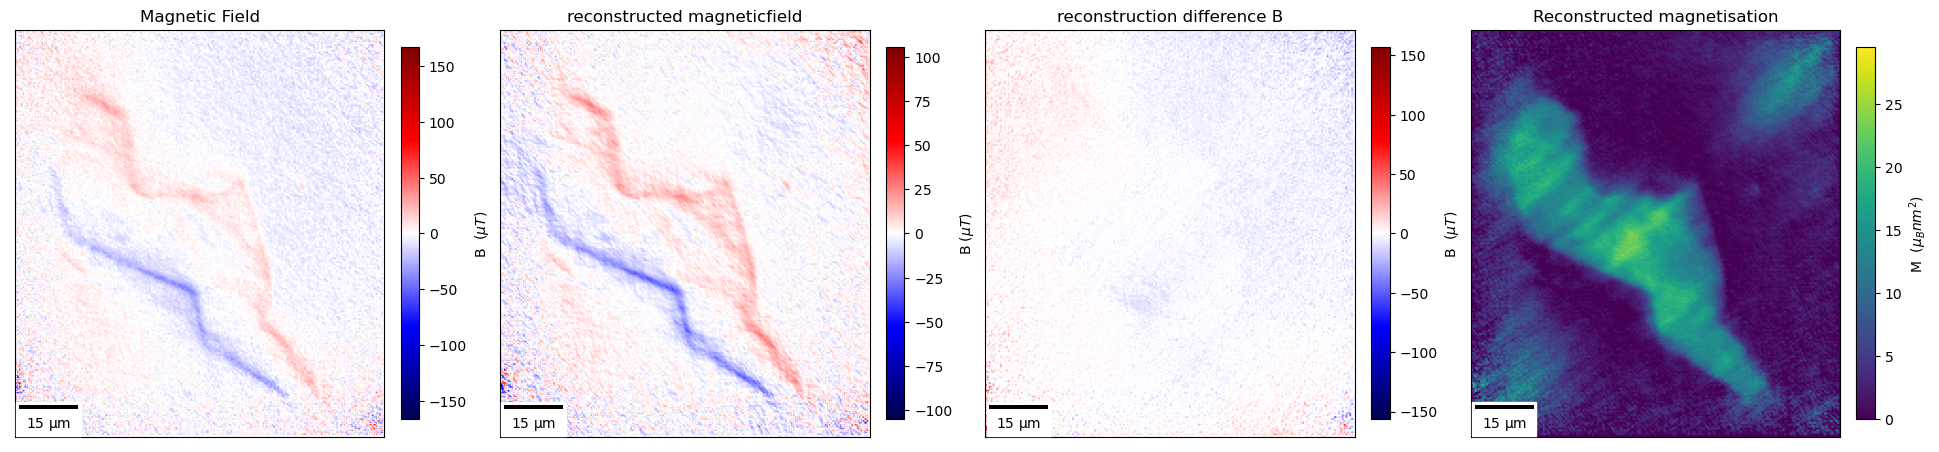

In [ ]:
# Get the results and plot (old Generator with duplicate BatchNorm layers)
Results = CNN_training.extract_results(plotResults = True)

# 3. Evaluation

## 3.1. Load data to evaluate on

[[ 3.94336766e-06 -6.07115250e-06  1.22681104e-05 ... -5.88175851e-06
   1.44587400e-05 -6.67861589e-06]
 [-1.16785474e-05  5.93845674e-06 -3.46556504e-06 ... -2.26819256e-05
   2.89130931e-05  2.63516225e-05]
 [-1.05259909e-05 -2.48646712e-05  3.56762230e-06 ... -1.00370835e-05
  -1.28770884e-05  1.12021631e-05]
 ...
 [-3.54951342e-05 -1.23828046e-05  3.37599918e-05 ... -3.05581326e-05
  -5.11515139e-05  2.47953028e-05]
 [-4.25775527e-05  1.34110128e-05  1.14523178e-05 ... -1.82521578e-05
   2.56685707e-05 -6.11408293e-06]
 [-4.81065840e-05 -3.26336713e-05 -1.07344163e-04 ... -5.52006571e-05
   2.26014354e-05 -1.30605252e-05]]
[[ 3.94336766e-06 -6.07115250e-06  1.22681104e-05 ... -5.88175851e-06
   1.44587400e-05 -6.67861589e-06]
 [-1.16785474e-05  5.93845674e-06 -3.46556504e-06 ... -2.26819256e-05
   2.89130931e-05  2.63516225e-05]
 [-1.05259909e-05 -2.48646712e-05  3.56762230e-06 ... -1.00370835e-05
  -1.28770884e-05  1.12021631e-05]
 ...
 [-3.54951342e-05 -1.23828046e-05  3.3759991

{'PixelSize': 4.8e-07,
 'ImageShape': 256,
 'NV': {'Height': 3e-07,
  'Theta': 0,
  'FindTheta': False,
  'Phi': 0,
  'FindPhi': False},
 'Magnetisation': {'Phi': -45,
  'FindPhi': False,
  'Theta': 90,
  'FindTheta': False},
 'FFT': {'PaddingFactor': 2,
  'performPadding': False,
  'PaddingMode': 'constant',
  'Extended': False,
  'Extention': 100,
  'Filter': {'useHanning': False,
   'useHighCutoff': False,
   'useLowCutoff': False,
   'LambdaHighCutoff': 1e-07,
   'LambdaLowCutoff': 7e-06}}}

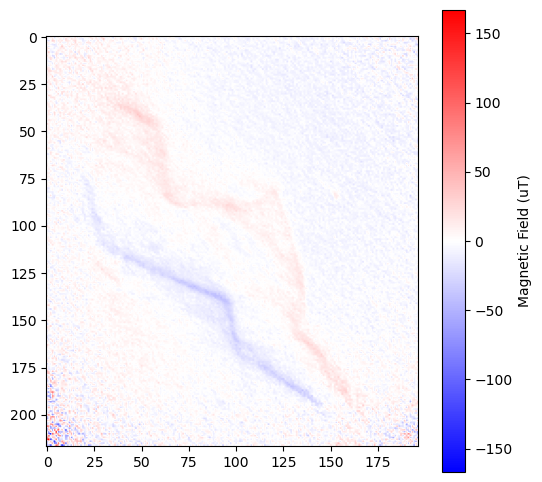

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load data
dataPath='data/Magnetisation in plane/CuCrP2S6_unimelb_measurement_70_Bnv.json'
PROP = LoadData(dataPath, ImageShape = 256, Normalise=True, Display=True)

# Update some of the options
PROP.options['Magnetisation']['Theta']= 90
PROP.options['Magnetisation']['FindTheta']= False
PROP.options['Magnetisation']['Phi'] = -45
PROP.options['Magnetisation']['FindPhi']= False
display(PROP.options)

In [6]:
# Make the neural network
Generator = generator_CNN(Size=1, ImageSize=PROP.options['ImageShape']).to(device)